In [275]:
import pandas as pd
import src.downloading_and_cleaning as dc
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import collections

In [5]:
df = pd.read_csv("data/dataset.csv")

main_characters = ['Joey', 'Chandler', 'Ross', 'Monica', 'Rachel', 'Phoebe', 'Gunther', 'Mike', 'Janice']

df = dc.cleaning(df,main_characters)

df.head()

,index,author,episode_number,episode_title,quote,season
0,0,Monica,1,Monica Gets A Roommate,There's nothing to tell! He's just some guy I ...,1
1,1,Joey,1,Monica Gets A Roommate,"C'mon, you're going out with the guy! There's ...",1
2,2,Chandler,1,Monica Gets A Roommate,"All right Joey, be nice. So does he have a hum...",1
3,3,Phoebe,1,Monica Gets A Roommate,"Wait, does he eat chalk?",1
4,4,Phoebe,1,Monica Gets A Roommate,"Just, 'cause, I don't want her to go through w...",1


In [294]:
def script(df,author):
    whole_script = str(list(df[df['author'] == author].quote))
    whole_script = whole_script.replace("[", "")
    whole_script = whole_script.replace("\\x92", "")
    whole_script = whole_script.replace("\"","")
    whole_script = whole_script.replace("'","")
    whole_script = whole_script.replace(",","")
    whole_script = whole_script.replace(".","")
    whole_script = whole_script.replace("!","")
    whole_script = whole_script.replace("?","")
    whole_script = whole_script.replace(")","")
    whole_script = whole_script.replace("(","")
    return whole_script

In [296]:

stop_words = stopwords.words('english')
stop_words += ['tell', 'im', 'hi','uh' ,'oh', 'dont', 'well', 'know', 'gonna', 'get', 'okay', 'youre', 'like', 'thats', 'yeah', 'think', 'she', 'yknow', 'really', 'mean', 'right', 'look', 'to', 'go', 'hey', 'uhh', 'got', 'come', 'see', 'cant', 'one', 'want', 'going', 'say', 'guys', 'good', 'back', 'god', 'ok', 'wanna']

In [297]:
def commonwds(main_characters,df,stop_words,whole_script):
    most_common = {}
    for character in main_characters:
        whole_script = script(df,character)
        wordcount = {}
        for word in whole_script.lower().split():
            if word not in stop_words:
                if word not in wordcount:
                    wordcount[word] = 1
                else:
                    wordcount[word] += 1
        word_counter = collections.Counter(wordcount)
        for word, count in word_counter.most_common(2):
            most_common[character] = word
        return most_common

In [298]:
most_common

{'Joey': 'chandler',
 'Chandler': 'joey',
 'Ross': 'joey',
 'Monica': 'phoebe',
 'Rachel': 'joey',
 'Phoebe': 'rachel',
 'Gunther': 'joey',
 'Mike': 'love',
 'Janice': 'laughs'}

In [266]:
whole = ""
word_c = {}
for character in main_characters:
    whole += script(df,character)
    wordcount = {}
    for word in whole.lower().split():
        if word not in stop_words:
            if word not in wordcount:
                wordcount[word] = 1
            else:
                wordcount[word] += 1
    word_counter = collections.Counter(wordcount)
    for word, count in word_counter.most_common(5):
        word_c[word] = count

In [274]:
word_c

{'ross': 1939,
 'chandler': 1610,
 'rachel': 1392,
 'joey': 1751,
 'monica': 1414,
 'great': 338}

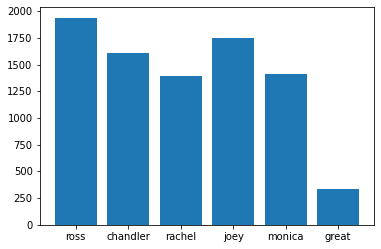

In [277]:
plt.bar(*zip(*word_c.items()))
plt.show()

In [299]:
    for word in whole_script.lower().split():
        if word not in stop_words:
            if word not in wordcount:
                wordcount[word] = 1
            else:
                wordcount[word] += 1
    word_counter = collections.Counter(wordcount)
    for word, count in word_counter.most_common(2):
        most_common[character] = word
        word_c[word] = count

TypeError: unhashable type: 'list'

In [281]:
character = ['Joey', 'Chandler', 'Ross', 'Monica', 'Rachel', 'Phoebe', 'Gunther', 'Mike', 'Janice']
word = ['chandler', 'joey', 'joey', 'phoebe','joey', 'rachel','joey','love','laughs']
sentiment = ['neutral', 'positive', 'positive', 'neutral','positive','positive','neutral', 'neutral', 'positive']

dict_ = { 'character' : author,
         'word' : word,
         'sentiment' : sentiment
        }

new_df = pd.DataFrame.from_dict(dict_)
new_df


,character,word,sentiment
0,Joey,chandler,neutral
1,Chandler,joey,positive
2,Ross,joey,positive
3,Monica,phoebe,neutral
4,Rachel,joey,positive
5,Phoebe,rachel,positive
6,Gunther,joey,neutral
7,Mike,love,neutral
8,Janice,laughs,positive


In [283]:
from pymongo import MongoClient
import json

In [285]:
new_df.to_json("friends_json",orient="records")

In [286]:
!mongoimport --db friends --collection quotes --jsonArray friends_json

2021-05-01T19:19:23.317+0200	connected to: mongodb://localhost/
2021-05-01T19:19:23.323+0200	9 document(s) imported successfully. 0 document(s) failed to import.
